In [90]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [91]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch            ticket     fare cabin embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [93]:
train.describe()
#sibsp:    # of siblings / spouses aboard the Titanic     
#parch:    # of parents / children aboard the Titanic     


survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [94]:
#TODO
#convert features into numeric
#scale the features that have very wide ranges
#impute NaNs


In [95]:
#missing data
#get the total missing values
total = train.isnull().sum().sort_values(ascending=False)

#calculate the percentage of missing values from total
percent_1 = train.isnull().sum()/train.isnull().count()*100

#round the percentage calculted above ans sort descending
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

#make a data frame with the colnames and the number of missing values, along with the equivalent percentage
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Total     %
cabin       687  77.1
age         177  19.9
embarked      2   0.2
fare          0   0.0
ticket        0   0.0

In [96]:
#get a list with all the features in the dataframe
train.columns.values

array(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

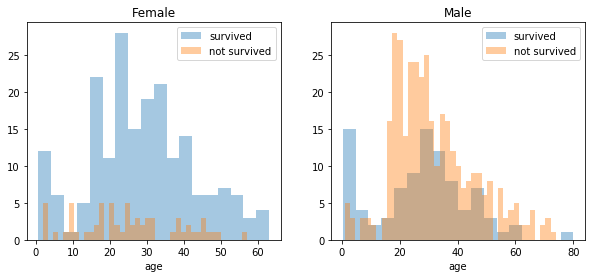

In [97]:
#plot survival by gender and age
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
#select women fron df
women = train[train['sex']=='female']
#select men from df
men = train[train['sex']=='male']
#drop NAs from the Age column and plot those who survived (1) and those who did not (0)
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#certain ages have increased rates of survval, thus those age classes need to be rescaled

C:\Users\Gins - SI\.conda\envs\environ_AO\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


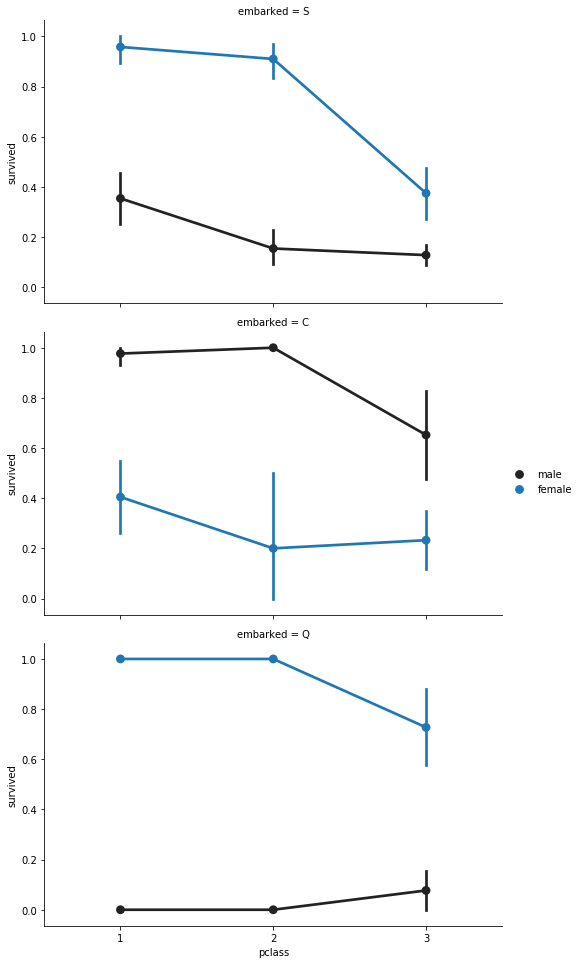

In [98]:
#emparked, pcclass

FacetGrid = sns.FacetGrid(train, row='embarked', size=4.5, aspect=1.6)

#poinplot allows plotting the average value for the specific features (survived in our case) together with the confidence 
#interval around the average - default ci = 95% (alpha = 5%)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', ci = 95, palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()



#Embarked seems to be correlated with survival, depending on the gender.
#Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. 
#Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

#Pclass also seems to be correlated with survival.

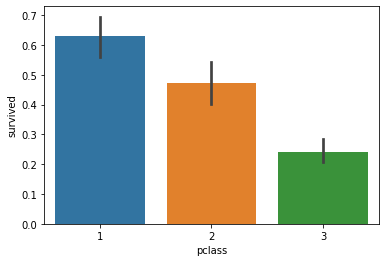

In [99]:
sns.barplot(x='pclass', y='survived', data=train)
#Show point estimates and confidence intervals as rectangular bars.

#Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

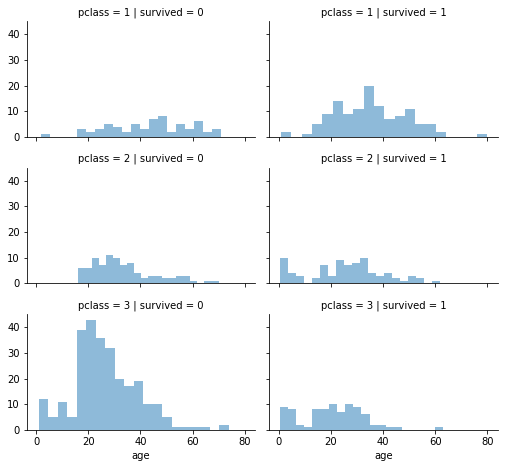

In [100]:
grid = sns.FacetGrid(train, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

#The plot above confirms the assumption about pclass 1

#also high probability that a person in pclass 3 will not survive.

In [101]:
#SibSp and Parch combined to show if a person was alone or not on board
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
print("Not alone passangers (1), alone passangers (0):" )    
train['not_alone'].value_counts()

Not alone passangers (1), alone passangers (0):


1    537
0    354
Name: not_alone, dtype: int64

C:\Users\Gins - SI\.conda\envs\environ_AO\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


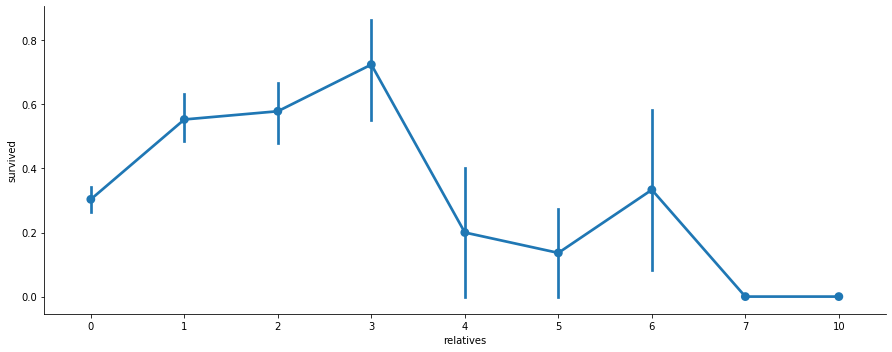

In [102]:
#chance of survival in relation to the number of relatives
axes = sns.factorplot('relatives','survived', 
                      data=train, aspect = 2.5, )

#higher chance of survival if one passanger had 1-3 relatives

# Data processing

In [103]:
#missing data in cabin column --> extract the deck from the cabin info and fillin 0 for when it is NA

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['cabin'] = dataset['cabin'].fillna("U0")
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['cabin'], axis=1)
test = test.drop(['cabin'], axis=1)

In [104]:
train

survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        sex   age  sibsp  parch            ticket     fare embarked  \
0      male  22.0      1      0         A/5 21171   7.2500        S   
1    female  38.0      1      0          PC 17599  71.2833        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250        S   
3    female  35.0      1      0            113803  53.1000        S   
4      male  35.0      0      0            373450   8.0500        S   
..      ...   ...    ...    ...               ...      ...      ...   
886    male  27.0      0      0            211536  13.0000        S   
887  female  19.0      0      0            112053  30.0000        S   
888  female   NaN      1      2        W./C. 6607  23.4500        S   
889    male  26.0      0      0            111369  30.0000        C   
890    male  32.0      0      0            370376   7.7500        Q   

     relatives  not_alone  deck  
0            1          0     8  
1            1          0     3  
2            0          1     8  
3            1          0     3  
4            0          1     8  
..         ...        ...   ...  
886          0          1     8  
887          0          1     2  
888          3          0     8  
889          0          1     3  
890          0          1     8  

[891 rows x 13 columns]

In [105]:
#missing data in age column - take the mean and take the sd for age, take random numbers between mean - std and mean + std
#and fill in where age is null

data = [train, test]

for dataset in data:
    mean = train["age"].mean()
    std = test["age"].std()
    is_null = dataset["age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = train["age"].astype(int)
train["age"].isnull().sum()

0

In [106]:
#missing data in embarked column - fill in the most common value
train['embarked'].describe()
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

In [107]:
#converting cat features to numeric
#name
#sex
#ticket
#emarked

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
survived     891 non-null int64
pclass       891 non-null int64
name         891 non-null object
sex          891 non-null object
age          891 non-null int32
sibsp        891 non-null int64
parch        891 non-null int64
ticket       891 non-null object
fare         891 non-null float64
embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [108]:
#convert fare to int
data = [train, test]

for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [109]:
#extract titles from the names and add them as a different column 
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['title'] = dataset['title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['title'] = dataset['title'].fillna(0)
train = train.drop(['name'], axis=1)
test = test.drop(['name'], axis=1)

In [110]:
#convert sex to numeric
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

In [111]:
#drop ticket column
train = train.drop(['ticket'], axis=1)
test = test.drop(['ticket'], axis=1)

In [112]:
#convert embarked into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [113]:
#convert age into multiple categories
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 6

# let's see how it's distributed 

train['age'].value_counts()

6    162
4    159
5    154
3    136
2    116
1     96
0     68
Name: age, dtype: int64

In [114]:
#convert fare into multiple categories using qcut - quantile based discretization function into equal sized bins
pd.qcut(train['fare'], q=6)

data = [train, test]

for dataset in data:
    dataset.loc[ dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare']   = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare']   = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare']   = 4
    dataset.loc[ dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)
    


# Testing ML models

In [115]:
X_train = train.drop("survived", axis=1)
Y_train = train["survived"]
X_test  = test.copy()

# stochastic gradient descent - linear model

In [119]:
#The word ‘stochastic‘ means a system or a process that is linked with a random probability. 
#Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for
#each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from 
#a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, 
#like Batch Gradient Descent, the batch is taken to be the whole dataset. Although, using the whole dataset is really 
#useful for getting to the minima in a less noisy or less random manner, but the problem arises when our datasets get 
#really huge.
#Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, 
#you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, 
#and it has to be done for every iteration until the minima is reached. Hence, it becomes computationally very expensive 
#to perform.
#This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, 
#to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

#https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

#accuracy
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.1

# random forest

In [120]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

#accuracy
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.93

# logistic regression

In [121]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

#accuracy
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\Gins - SI\.conda\envs\environ_AO\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.26

# K nearest neighbours

In [123]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  

#accuracy
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.99

# gaussian naive Bayes

In [124]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  

#accuracy
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.56

# linear support vector machine

In [125]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

#accuracy
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\Gins - SI\.conda\envs\environ_AO\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


81.26

# decision tree classifier

In [126]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  

#accuracy
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

92.93

In [128]:
#find which algo throws the highest accuracy

results = pd.DataFrame({
    'Model': ['Support vector machine','KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

Model
Score                            
92.93               Random Forest
92.93               Decision Tree
87.99                         KNN
81.26      Support vector machine
81.26         Logistic Regression
78.56                 Naive Bayes
77.10  Stochastic Gradient Decent

# cross validation

In [132]:
# k- fold cross validation - k = 10 --> outputs an array with 10 different scores.
# The result of the K-Fold Cross Validation example would be an array that contains 10 different scores. 
#We then need to compute the mean and the standard deviation for these scores.

#random forest model - due to it having the highest accurracy score when compared to the other models
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

print("The final accuracy score for random forest after cross validation is: ",
      round(scores.mean(), 2),
      "+/-", 
      round(scores.std(), 2))


Scores: [0.77777778 0.8        0.78651685 0.84269663 0.87640449 0.86516854
 0.83146067 0.76404494 0.84269663 0.82954545]
Mean: 0.8216311996368176
Standard Deviation: 0.03589233616071066
The final accruacy score for random forest after cross validation is:  0.82 +/- 0.04


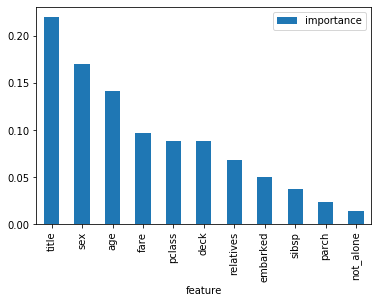

In [134]:
#feature importamce of random forest
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()


In [135]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

#the not-survived-predictions: 481 passengers were correctly classified as not survived (true negatives) and 68 where wrongly classified as not survived (false positives).
#the survived-predictions: 105 passengers where wrongly classified as survived (false negatives) and 237 where correctly classified as survived (true positives).

array([[481,  68],
       [105, 237]], dtype=int64)

In [139]:
#precision an drecall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions), "(of the time the algo predicts a passenger survival correctly)")
print("Recall:",recall_score(Y_train, predictions), "(algo predicted the survival of this amount of passengers who actually survived)")

Precision: 0.7770491803278688 (of the time the algo predicts a passenger survival correctly)
Recall: 0.6929824561403509 (algo predicted the survival of this amount of passengers who actually survived)
